TFM / 3 Entrega
Graficos


In [ ]:
#cargamos llibrerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**WEATHER DATASET**

https://github.com/GRUPO3TFM/TFM/blob/main/dataset_train.csv

In [ ]:
# URL WEATHER DATA MUNICH station ID 03379
url = 'https://raw.githubusercontent.com/GRUPO3TFM/TFM/main/weather_data_munich_20100101_20231231_03379.txt'

#leemos el archivo
weather = pd.read_csv(url, delimiter=';')

#mostramos head del df
#print(weather.head())

#revisamos los nombres de todas las columnas
print(weather.columns)

Index(['ESTACION_ID', 'FECHA_MEDICION', 'CN_3', 'VIENTO_RAF', 'VIENTO_VEL',
       'CN_4', 'LLUVIA_DIARIO', 'LLUVIA_FORM', 'SOL_DURACION', 'NIEVE_PROF',
       'AVG_NUBES', 'AVG_PR_VAPOR', 'AVG_PR_ATM', 'AVG_TEMP', 'AVG_HUM',
       'TEMP_MAX', 'TEMP_MIN', 'TEMP_MIN_BAJOSUELO', 'FINAL_REG'],
      dtype='object')


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5113 entries, 0 to 5112
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESTACION_ID         5113 non-null   int64  
 1   FECHA_MEDICION      5113 non-null   int64  
 2   CN_3                5113 non-null   int64  
 3   VIENTO_RAF          5113 non-null   float64
 4   VIENTO_VEL          5113 non-null   float64
 5   CN_4                5113 non-null   int64  
 6   LLUVIA_DIARIO       5113 non-null   float64
 7   LLUVIA_FORM         5113 non-null   int64  
 8   SOL_DURACION        5113 non-null   float64
 9   NIEVE_PROF          5113 non-null   int64  
 10  AVG_NUBES           5113 non-null   float64
 11  AVG_PR_VAPOR        5113 non-null   float64
 12  AVG_PR_ATM          5113 non-null   float64
 13  AVG_TEMP            5113 non-null   float64
 14  AVG_HUM             5113 non-null   float64
 15  TEMP_MAX            5113 non-null   float64
 16  TEMP_M

In [ ]:
from datetime import datetime

#funcion para convertir integer para datetime
# Function to convert YYYYMMDD integer to datetime
def convert_to_datetime(date_int):
    date_str = str(date_int)
    return datetime(year=int(date_str[0:4]), month=int(date_str[4:6]), day=int(date_str[6:8]))

#aplicamos la funcion a nuestro df
weather['FECHA_MEDICION'] = weather['FECHA_MEDICION'].apply(convert_to_datetime)

#mostramos resultados
print(weather)

      ESTACION_ID FECHA_MEDICION  CN_3  VIENTO_RAF  VIENTO_VEL  CN_4  \
0            3379     2010-01-01    10        10.7         1.6    10   
1            3379     2010-01-02    10        11.6         4.2    10   
2            3379     2010-01-03    10         8.3         2.8    10   
3            3379     2010-01-04    10         4.4         1.6    10   
4            3379     2010-01-05    10         6.0         2.2    10   
...           ...            ...   ...         ...         ...   ...   
5108         3379     2023-12-27     3         6.7         1.9     3   
5109         3379     2023-12-28     3         7.8         2.6     3   
5110         3379     2023-12-29     3        15.1         3.8     3   
5111         3379     2023-12-30     3        11.4         3.5     3   
5112         3379     2023-12-31     3         9.7         2.5     3   

      LLUVIA_DIARIO  LLUVIA_FORM  SOL_DURACION  NIEVE_PROF  AVG_NUBES  \
0               4.3            8         0.000           0    

In [ ]:
#revisamos si hay valores nulos
weather.isnull().sum()

#eliminamos las dos columnas que no necesitamos ESTACION_ID y FINAL_REG

# Eliminar las columnas 'ESTACION_ID' y 'FINAL'
weather = weather.drop(columns=['ESTACION_ID', 'FINAL_REG'])


#revisamos si hay valores nulos
weather.isnull().sum()

FECHA_MEDICION        0
CN_3                  0
VIENTO_RAF            0
VIENTO_VEL            0
CN_4                  0
LLUVIA_DIARIO         0
LLUVIA_FORM           0
SOL_DURACION          0
NIEVE_PROF            0
AVG_NUBES             0
AVG_PR_VAPOR          0
AVG_PR_ATM            0
AVG_TEMP              0
AVG_HUM               0
TEMP_MAX              0
TEMP_MIN              0
TEMP_MIN_BAJOSUELO    0
dtype: int64

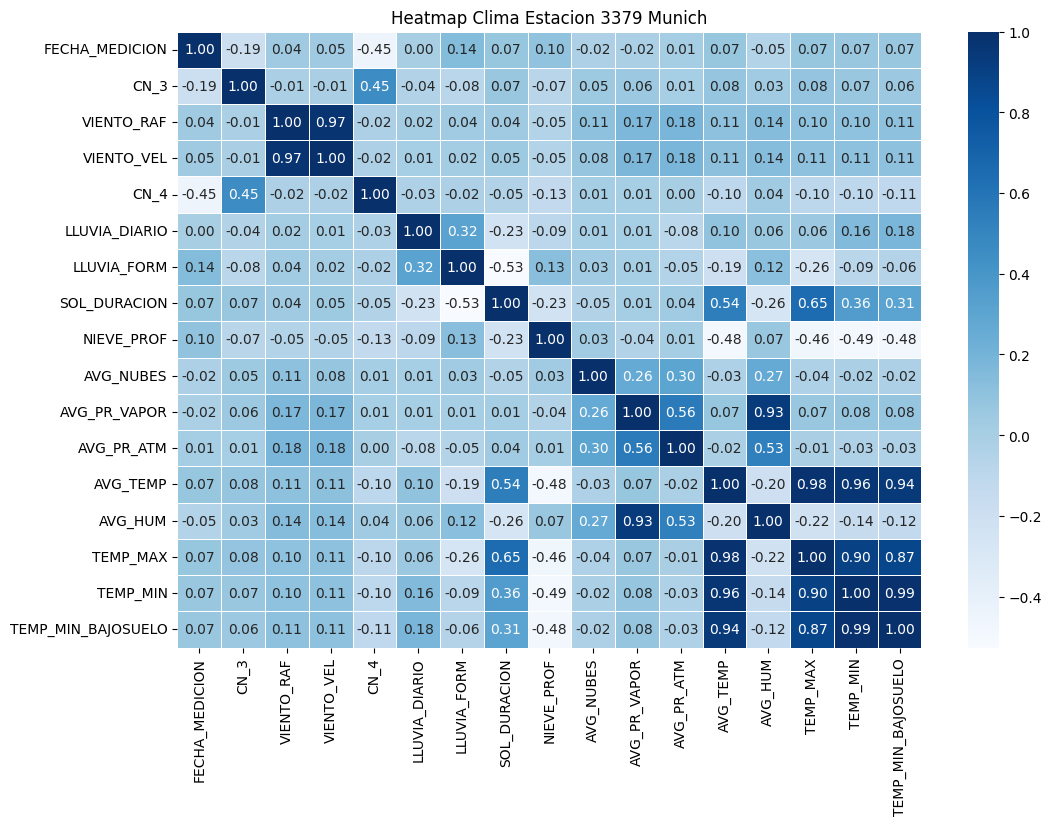

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#calculamos la matriz de correlacion
correlation_matrix = weather.corr()

#graficamos el Heatmap para ver las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Heatmap Clima Estacion 3379 Munich')
plt.show()

In [ ]:

#guardamos Lista de columnas que queremos mantener, las demas no nos interesan
columns_to_keep = ['FECHA_MEDICION', 'LLUVIA_DIARIO', 'VIENTO_VEL', 'SOL_DURACION', 'NIEVE_PROF', 'AVG_TEMP', 'TEMP_MAX', 'TEMP_MIN']

#creamos una copia del df con con las columnas mencionadas
weather2 = weather[columns_to_keep].copy()

#revisamos el head
print(weather2.head())


  FECHA_MEDICION  LLUVIA_DIARIO  VIENTO_VEL  SOL_DURACION  NIEVE_PROF  \
0     2010-01-01            4.3         1.6           0.0           0   
1     2010-01-02            0.7         4.2           0.6           4   
2     2010-01-03            0.0         2.8           3.3           4   
3     2010-01-04            0.0         1.6           7.6           4   
4     2010-01-05            0.0         2.2           0.0           2   

   AVG_TEMP  TEMP_MAX  TEMP_MIN  
0       3.1       4.9       0.1  
1      -2.5       0.1      -5.3  
2      -3.6      -0.3      -5.8  
3      -4.9      -0.1      -8.5  
4      -6.7      -5.3      -9.6  


array([[<Axes: title={'center': 'FECHA_MEDICION'}>,
        <Axes: title={'center': 'LLUVIA_DIARIO'}>,
        <Axes: title={'center': 'VIENTO_VEL'}>],
       [<Axes: title={'center': 'SOL_DURACION'}>,
        <Axes: title={'center': 'NIEVE_PROF'}>,
        <Axes: title={'center': 'AVG_TEMP'}>],
       [<Axes: title={'center': 'TEMP_MAX'}>,
        <Axes: title={'center': 'TEMP_MIN'}>, <Axes: >]], dtype=object)

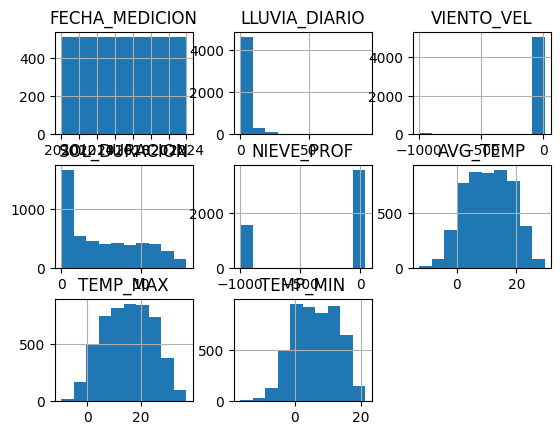

In [ ]:
#Visualization
weather2.hist()

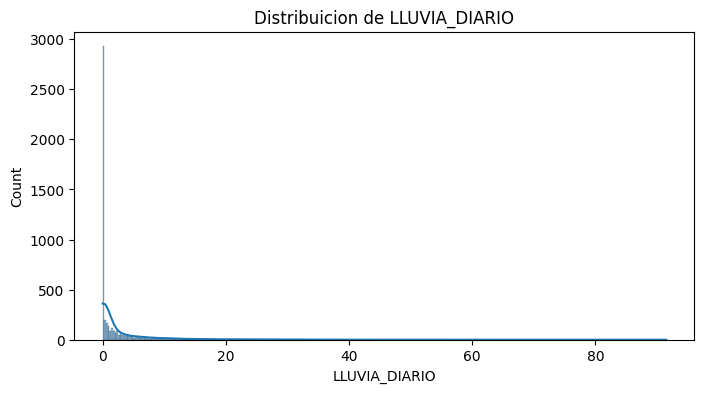

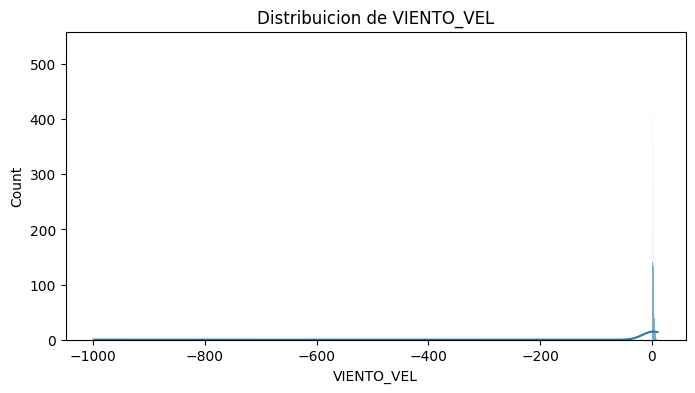

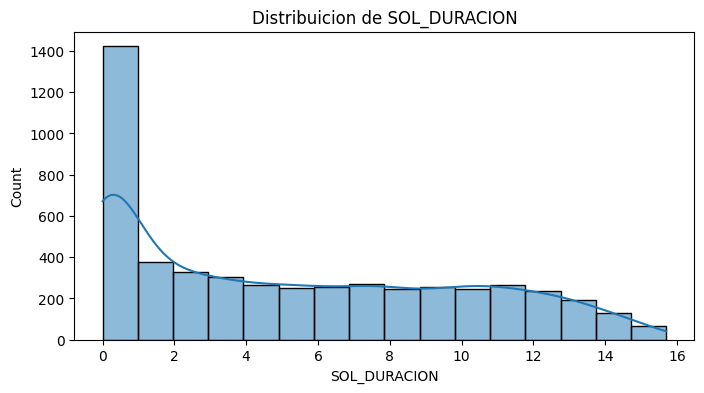

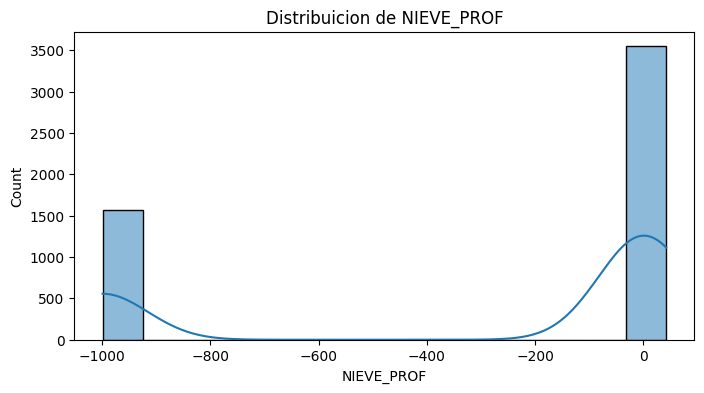

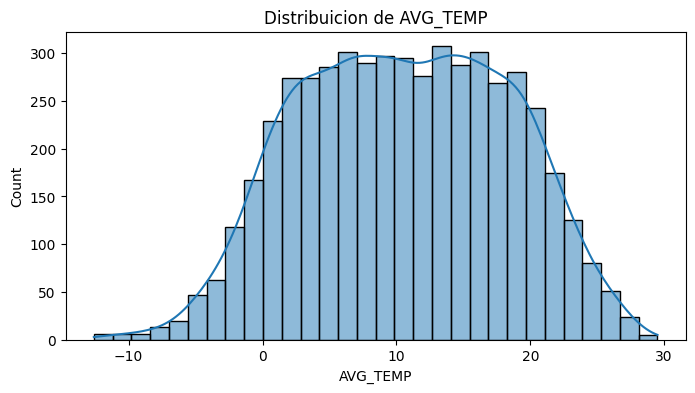

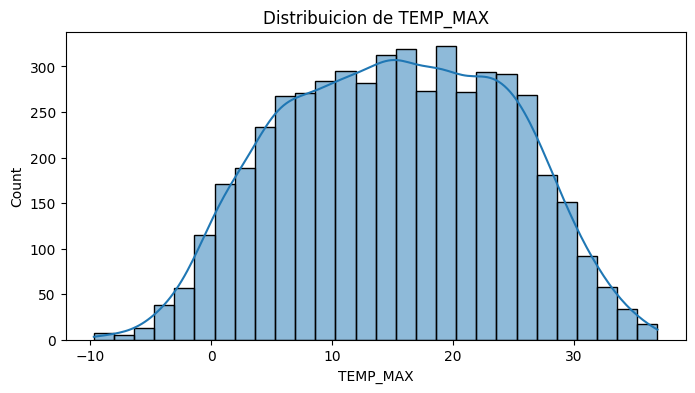

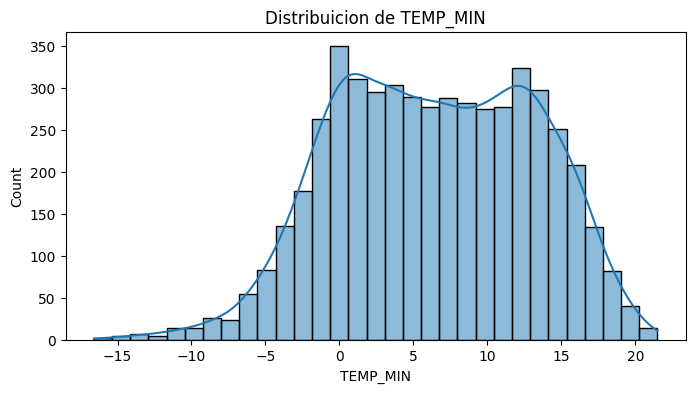

In [ ]:
#excluyemos colunas especificas
exclude= ['FECHA_MEDICION']
numeric_columns = weather2.select_dtypes(include=['float64', 'int64']).columns
columns_to_plot = [col for col in numeric_columns if col not in exclude]

#graficamos la distribuicion
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(weather2[column].dropna(), kde=True)
    plt.title(f'Distribuicion de {column}')
    plt.show()

<ipython-input-13-55a3f0225138>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


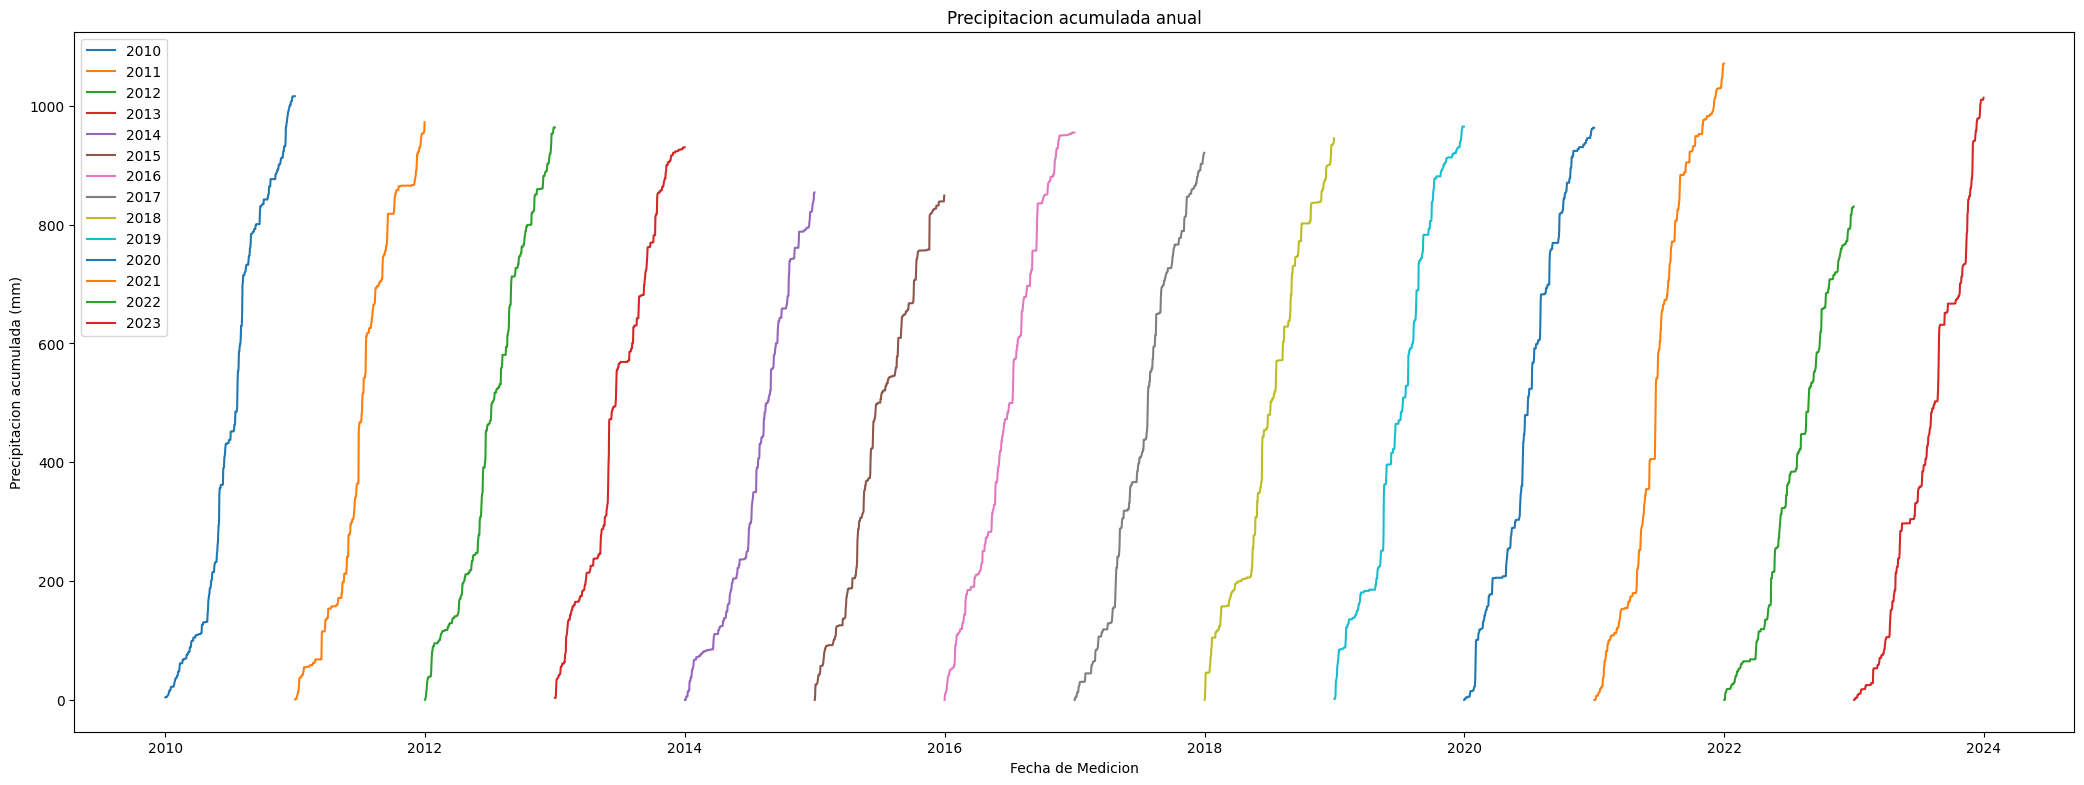

In [ ]:

#convertimos FECHA_MEDICION  para datetime (en el formato YYYYMMDD )
weather2['FECHA_MEDICION'] = pd.to_datetime(weather2['FECHA_MEDICION'], format='%Y%m%d')

#graficamos
fig = plt.figure(figsize=(20.0, 7.0), dpi=100)
ax = fig.add_axes([0, 0, 1, 1])


#agrupamos por ano y calculamos los valores de lluvia acumulada
for year, data_year in weather2.groupby(weather2['FECHA_MEDICION'].dt.year):
    cumulative_rain = data_year['LLUVIA_DIARIO'].cumsum()
    ax.plot(data_year['FECHA_MEDICION'], cumulative_rain, label=year)

# nombramos los ejes y el grafico
ax.set_xlabel('Fecha de Medicion')
ax.set_ylabel('Precipitacion acumulada (mm)')
ax.set_title('Precipitacion acumulada anual')

ax.legend()
plt.tight_layout()
plt.show()



<ipython-input-14-d1e78cbfca8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather2_2022['Week_Number'] = weather2_2022['FECHA_MEDICION'].dt.strftime('%U')


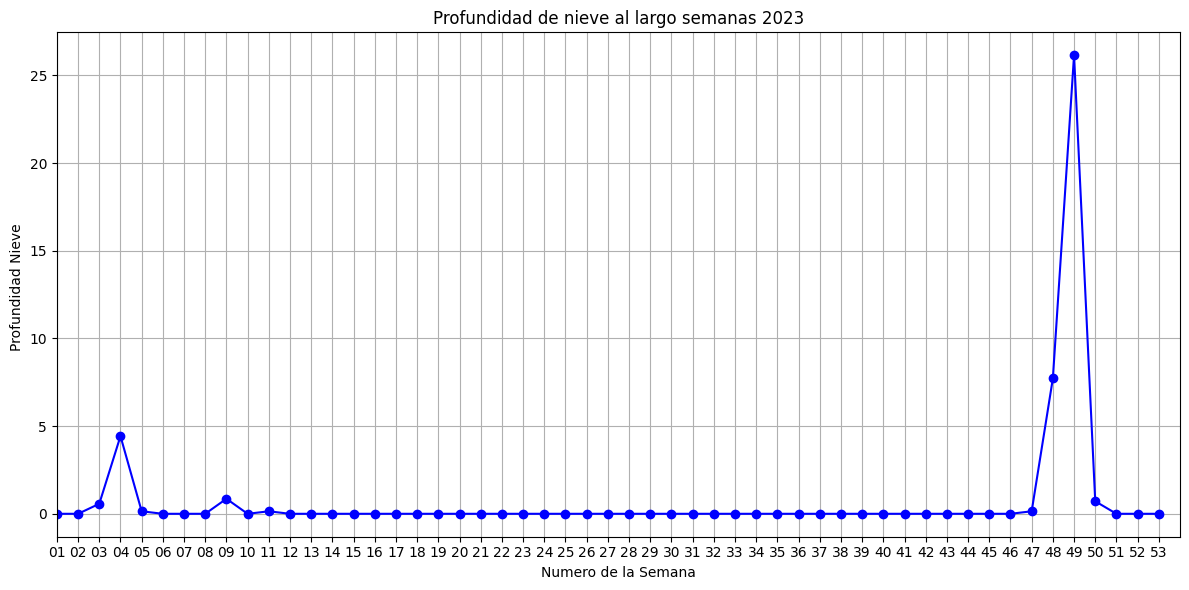

In [ ]:

#Filtramos por ejemplo ano  2023
weather2_2022 = weather2[(weather2['FECHA_MEDICION'].dt.year == 2023)]

# Group by week and calculate mean snow depth for each week
weather2_2022['Week_Number'] = weather2_2022['FECHA_MEDICION'].dt.strftime('%U')
weekly_data = weather2_2022.groupby('Week_Number').mean()

#graficamos
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['NIEVE_PROF'], marker='o', linestyle='-', color='b')

#nombramos ejes y titulos
plt.title('Profundidad de nieve al largo semanas 2023')
plt.xlabel('Numero de la Semana')
plt.ylabel('Profundidad Nieve ')
plt.grid(True)


#ajustamos el eje del X para una mejor visibilidad
plt.xlim(0, len(weekly_data.index))
plt.xticks(range(len(weekly_data.index)), weekly_data.index)  # xticks para numeros semana

plt.tight_layout()
plt.show()


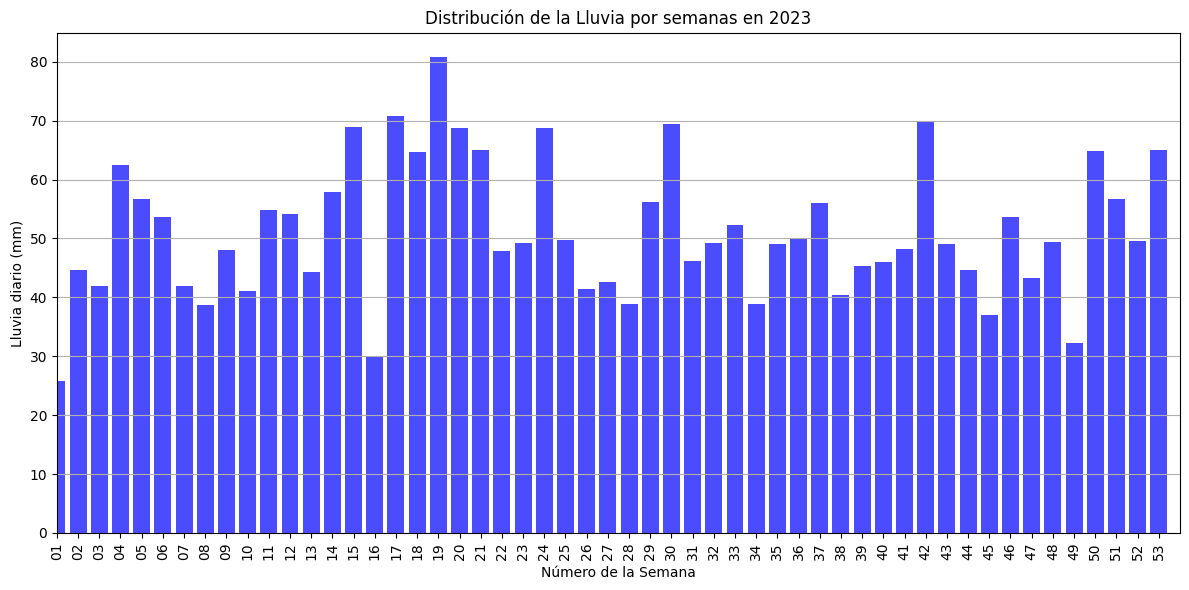

In [ ]:
###el mismo grafico que el anterior pero en histograma

import matplotlib.pyplot as plt
import numpy as np

data = {
    'FECHA_MEDICION': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'LLUVIA_DIARIO': np.random.randint(0, 100, size=365)
}

weather2 = pd.DataFrame(data)

#filtramos por ejemplo año 2023
weather2_2023 = weather2[weather2['FECHA_MEDICION'].dt.year == 2023]

#agrupamos por semana y calcular la profundidad de nieve promedio para cada semana
weather2_2023['Week_Number'] = weather2_2023['FECHA_MEDICION'].dt.strftime('%U')
weekly_data = weather2_2023.groupby('Week_Number').mean()

#graficamos el histograma
plt.figure(figsize=(12, 6))
plt.bar(weekly_data.index, weekly_data['LLUVIA_DIARIO'], color='b', alpha=0.7)

#nombramos ejes y títulos
plt.title('Distribución de la Lluvia por semanas en 2023')
plt.xlabel('Número de la Semana')
plt.ylabel('Lluvia diario (mm)')
plt.grid(axis='y')

#ajustamos el eje X para una mejor visibilidad
plt.xlim(0, len(weekly_data.index))
plt.xticks(range(len(weekly_data.index)), weekly_data.index, rotation=90)  # xticks para números semana

plt.tight_layout()
plt.show()


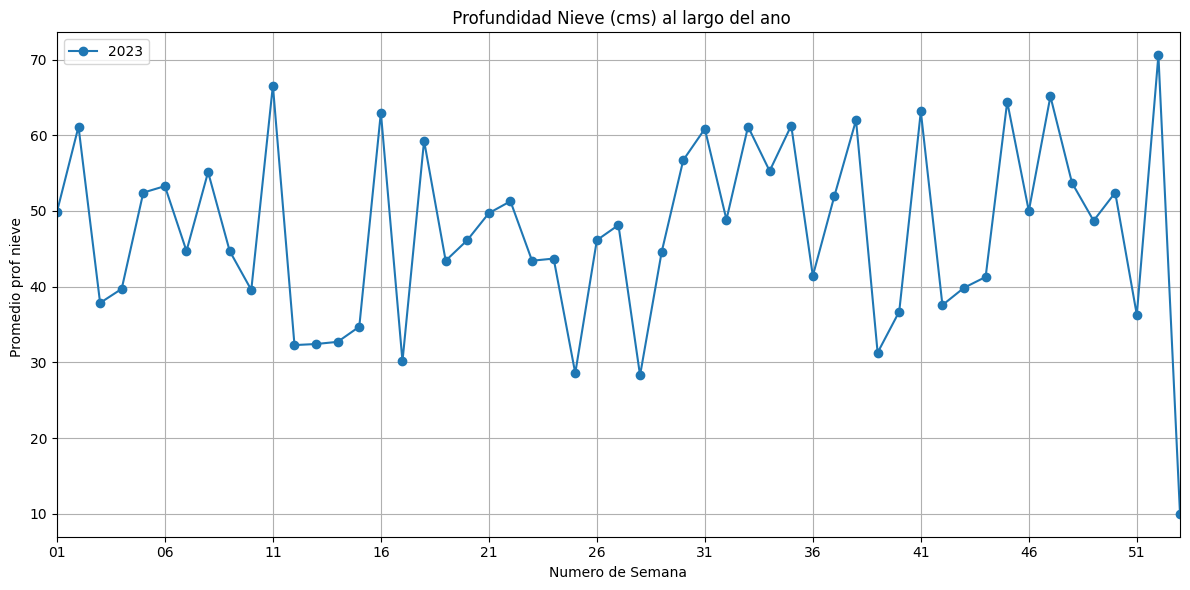

In [ ]:
#filtramos fecha por cada ano y calculamos
years = weather2['FECHA_MEDICION'].dt.year.unique()

data = {
    'FECHA_MEDICION': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'NIEVE_PROF': np.random.randint(0, 100, size=365)
}

weather2 = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

#graficamos cada ano por separado con colores distintos
for i, year in enumerate(years):
    data_year = weather2[weather2['FECHA_MEDICION'].dt.year == year]
    data_year['Week_Number'] = data_year['FECHA_MEDICION'].dt.strftime('%U')
    weekly_data = data_year.groupby('Week_Number').mean()

    plt.plot(weekly_data.index, weekly_data['NIEVE_PROF'], marker='o', linestyle='-', label=year)

#nombramos ejes y titulos
plt.title(' Profundidad Nieve (cms) al largo del ano')
plt.xlabel('Numero de Semana')
plt.ylabel('Promedio prof nieve ')
plt.grid(True)

# Adjust x-axis limits and ticks for better readability
plt.xlim(0, 52)  #assumimos 52 semanas al ano
plt.xticks(range(0, 53, 5))  #ajustamos xticks para la cada 5semana

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Verificar las columnas del DataFrame
print(weather2.columns)

# Mostrar las primeras filas del DataFrame para inspección visual
print(weather2.head())

Index(['FECHA_MEDICION', 'NIEVE_PROF'], dtype='object')
  FECHA_MEDICION  NIEVE_PROF
0     2023-01-01          34
1     2023-01-02          79
2     2023-01-03          27
3     2023-01-04          32
4     2023-01-05          45


AttributeError: Can only use .dt accessor with datetimelike values

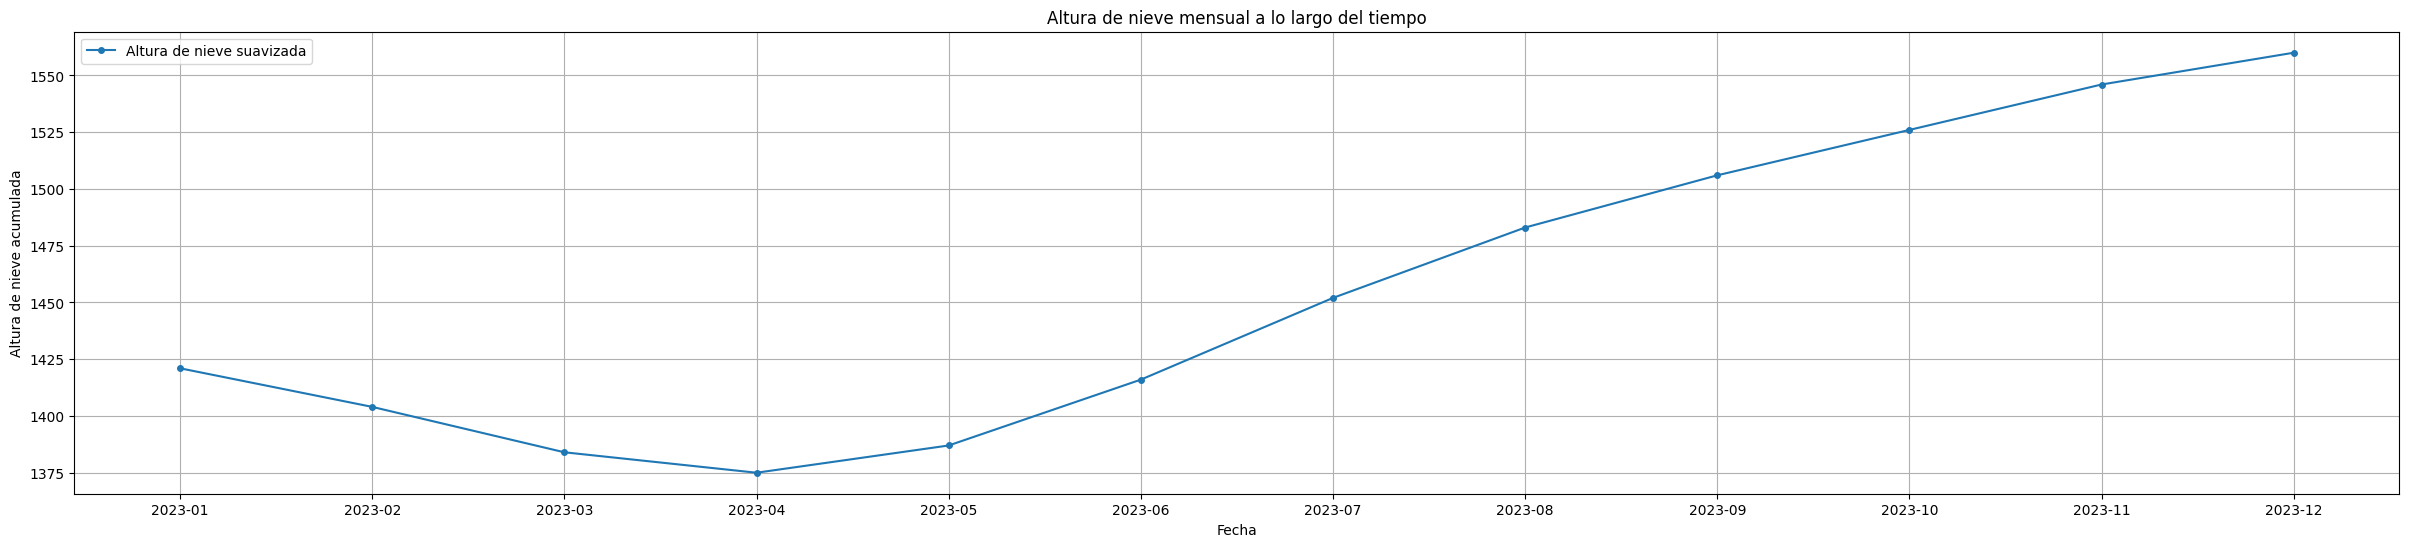

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d  # Para suavizado de datos


# Convertir la columna Fecha_Medicion a datetime
weather2['FECHA_MEDICION'] = pd.to_datetime(weather2['FECHA_MEDICION'])

# Extraer el año y el mes de la fecha
weather2['Year'] = weather2['FECHA_MEDICION'].dt.year
weather2['Month'] = weather2['FECHA_MEDICION'].dt.month

# Sumar la nieve por mes y año para obtener una tendencia mensual
monthly_snow = weather2.groupby(['Year', 'Month'])['NIEVE_PROF'].sum().reset_index()

# Crear una columna de fecha combinada de año y mes
monthly_snow['YearMonth'] = monthly_snow['Year'].astype(str) + '-' + monthly_snow['Month'].astype(str).str.zfill(2)

# Suavizar los datos mensuales utilizando un filtro gaussiano
monthly_snow['Nieve_prof_SMOOTH'] = gaussian_filter1d(monthly_snow['NIEVE_PROF'], sigma=2)

# Graficar con una figura más ancha y puntos más pequeños
plt.figure(figsize=(30, 6))  # Ajustar el tamaño de la figura (ancho x alto)
plt.plot(monthly_snow['YearMonth'], monthly_snow['Nieve_prof_SMOOTH'], label='Altura de nieve suavizada', marker='o', linestyle='-', markersize=4)  # markersize para hacer los puntos más pequeños
plt.title('Altura de nieve mensual a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Altura de nieve acumulada')
plt.legend()
plt.grid(True)

# Ajustar las etiquetas del eje X para mostrar solo una vez por año
years = monthly_snow['YearMonth'].dt.year.unique()
plt.xticks(ticks=[pd.to_datetime(f'{year}-01-01') for year in years], labels=years, rotation=180)

plt.tight_layout()
plt.show()

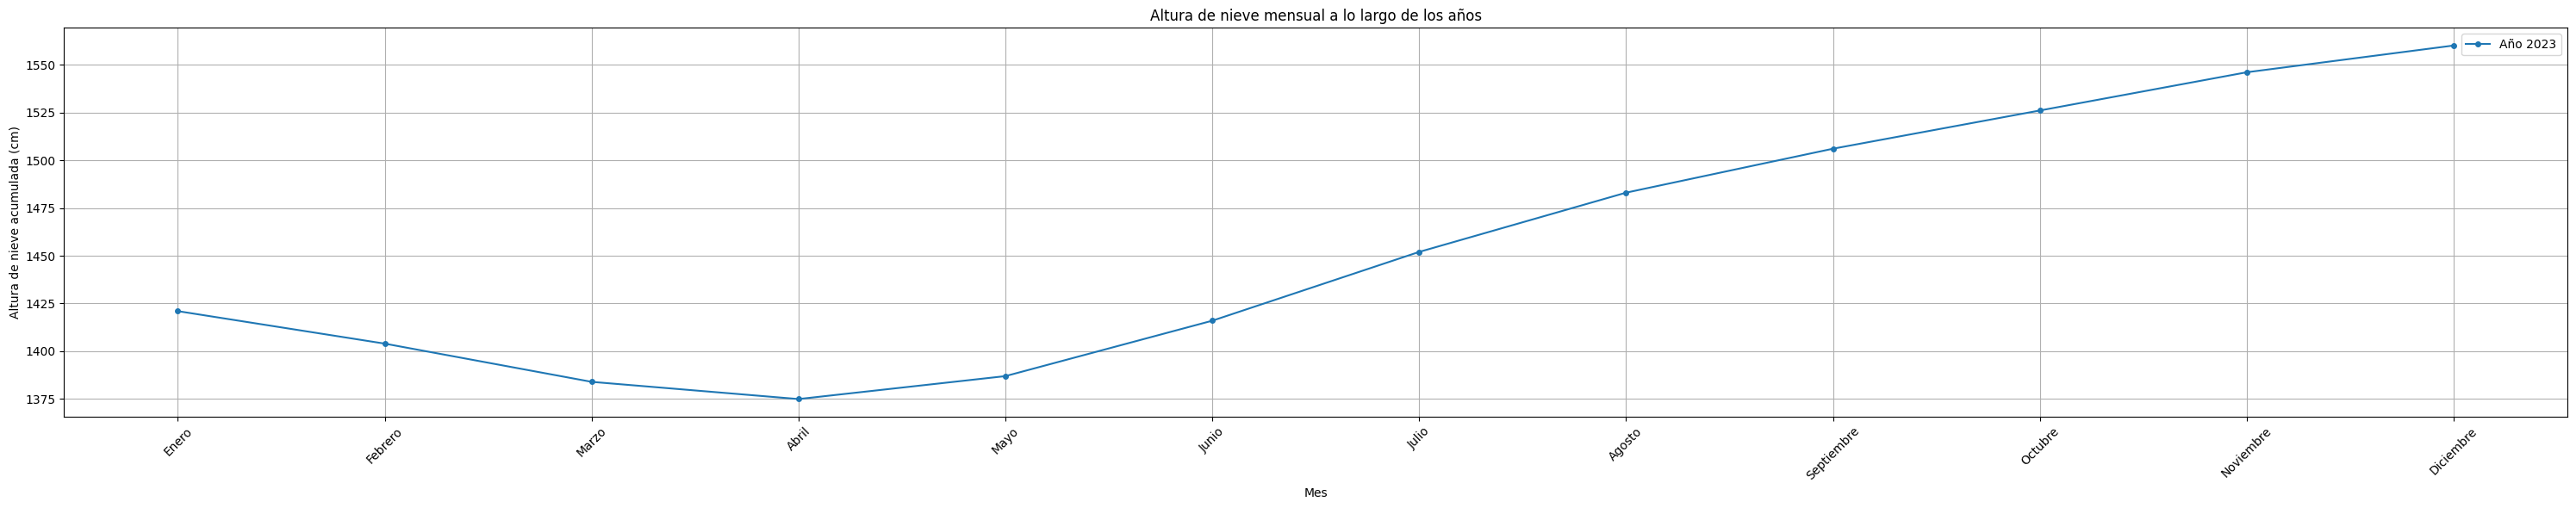

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Suponiendo que el DataFrame se llama weather2 y tiene las columnas mencionadas

# Convertir la columna Fecha_Medicion a datetime
weather2['FECHA_MEDICION'] = pd.to_datetime(weather2['FECHA_MEDICION'])

# Extraer el año y el mes de la fecha
weather2['Year'] = weather2['FECHA_MEDICION'].dt.year
weather2['Month'] = weather2['FECHA_MEDICION'].dt.month

# Crear una columna de fecha combinada de año y mes
weather2['YearMonth'] = pd.to_datetime(weather2['Year'].astype(str) + '-' + weather2['Month'].astype(str).str.zfill(2) + '-01')

# Inicializar el gráfico
plt.figure(figsize=(30, 6))  # Ajustar el tamaño de la figura (ancho x alto)

# Obtener los años únicos en los datos
years = weather2['Year'].unique()

# Asignar un color a cada año utilizando un mapa de colores
cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, len(years)))

# Iterar sobre los años y graficar cada uno por separado
for i, year in enumerate(years):
    yearly_data = weather2[weather2['Year'] == year]
    # Sumar la nieve por mes y año para obtener una tendencia mensual
    monthly_snow = yearly_data.groupby(['Month'])['NIEVE_PROF'].sum().reset_index()
    # Suavizar los datos mensuales utilizando un filtro gaussiano
    monthly_snow['Nieve_prof_SMOOTH'] = gaussian_filter1d(monthly_snow['NIEVE_PROF'], sigma=2)
    # Graficar cada año con un color distinto
    plt.plot(monthly_snow['Month'], monthly_snow['Nieve_prof_SMOOTH'], label=f'Año {year}', color=colors[i], marker='o', linestyle='-', markersize=4)

plt.title('Altura de nieve mensual a lo largo de los años')
plt.xlabel('Mes')
plt.ylabel('Altura de nieve acumulada (cm)')
plt.legend()
plt.grid(True)

# Configurar los nombres de los meses en el eje X
plt.xticks(np.arange(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)

plt.tight_layout()
plt.show()




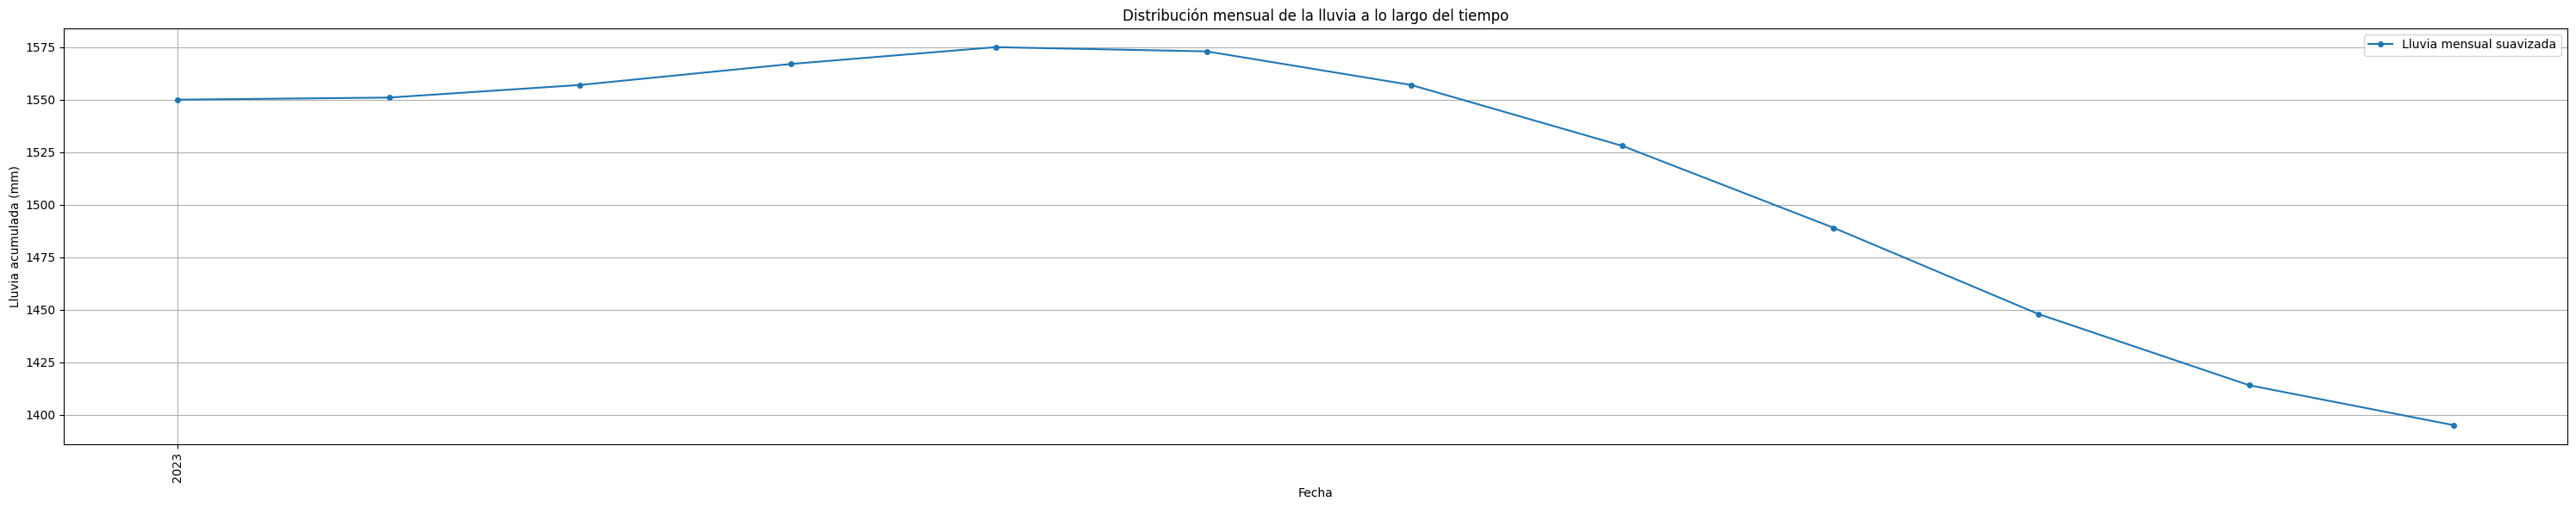

In [ ]:


data = {
    'FECHA_MEDICION': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'LLUVIA_DIARIO': np.random.randint(0, 100, size=365)
}

weather2 = pd.DataFrame(data)

# Suponiendo que el DataFrame se llama weather2 y tiene las columnas mencionadas
# Convertir la columna Fecha_Medicion a datetime
weather2['FECHA_MEDICION'] = pd.to_datetime(weather2['FECHA_MEDICION'])

# Extraer el año y el mes de la fecha
weather2['Year'] = weather2['FECHA_MEDICION'].dt.year
weather2['Month'] = weather2['FECHA_MEDICION'].dt.month

# Sumar la lluvia por mes y año para obtener una tendencia mensual
monthly_rain = weather2.groupby(['Year', 'Month'])['LLUVIA_DIARIO'].sum().reset_index()

# Crear una columna de fecha combinada de año y mes
monthly_rain['YearMonth'] = pd.to_datetime(monthly_rain['Year'].astype(str) + '-' + monthly_rain['Month'].astype(str).str.zfill(2) + '-01')

# Suavizar los datos mensuales utilizando un filtro gaussiano
monthly_rain['LLUVIA_SMOOTH'] = gaussian_filter1d(monthly_rain['LLUVIA_DIARIO'], sigma=2)

# Graficar con una figura más ancha y puntos más pequeños
plt.figure(figsize=(30, 6))  # Ajustar el tamaño de la figura (ancho x alto)
plt.plot(monthly_rain['YearMonth'], monthly_rain['LLUVIA_SMOOTH'], label='Lluvia mensual suavizada', marker='o', linestyle='-', markersize=4)  # markersize para hacer los puntos más pequeños
plt.title('Distribución mensual de la lluvia a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Lluvia acumulada (mm)')
plt.legend()
plt.grid(True)

# Ajustar las etiquetas del eje X para mostrar solo una vez por año
years = monthly_rain['YearMonth'].dt.year.unique()
ticks = [pd.to_datetime(f'{year}-01-01') for year in years]
plt.gca().set_xticks(ticks)
plt.gca().set_xticklabels(years, rotation=90)

plt.tight_layout()
plt.show()

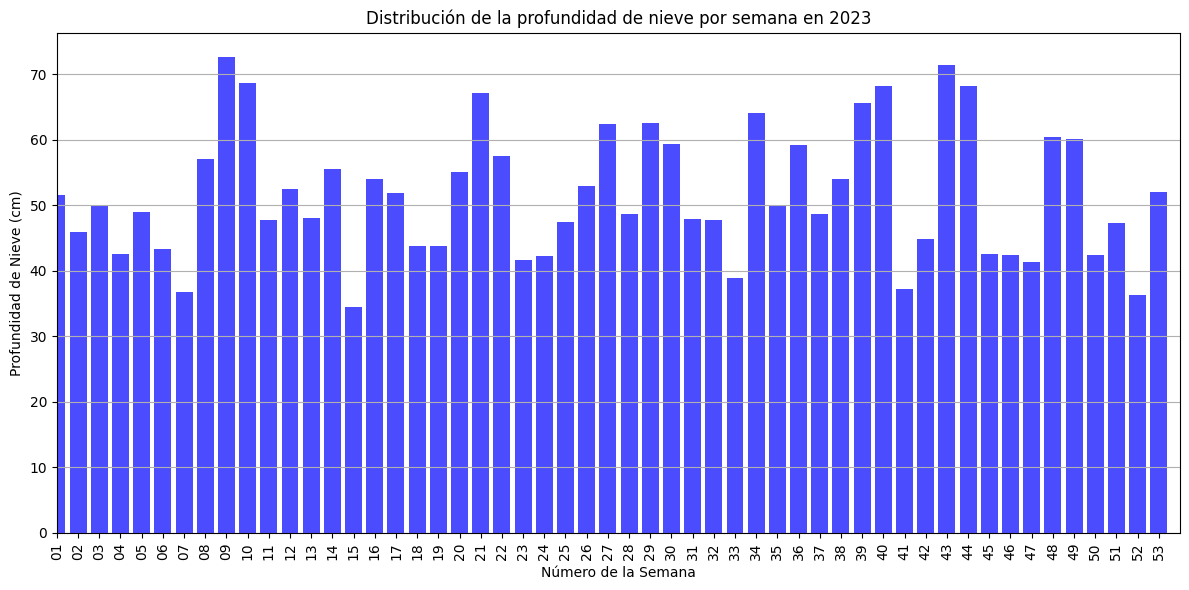

In [ ]:
###el mismo grafico que el anterior pero en histograma


# Crear un ejemplo de DataFrame similar para ilustrar
data = {
    'FECHA_MEDICION': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'NIEVE_PROF': np.random.randint(0, 100, size=365)  # Generar datos aleatorios para NIEVE_PROF
}
weather2 = pd.DataFrame(data)

#filtramos por ejemplo año 2023
weather2_2023 = weather2[weather2['FECHA_MEDICION'].dt.year == 2023]

#agrupamos por semana y calcular la profundidad de nieve promedio para cada semana
weather2_2023['Week_Number'] = weather2_2023['FECHA_MEDICION'].dt.strftime('%U')
weekly_data = weather2_2023.groupby('Week_Number').mean()

#graficamos el histograma
plt.figure(figsize=(12, 6))
plt.bar(weekly_data.index, weekly_data['NIEVE_PROF'], color='b', alpha=0.7)

#nombramos ejes y títulos
plt.title('Distribución de la profundidad de nieve por semana en 2023')
plt.xlabel('Número de la Semana')
plt.ylabel('Profundidad de Nieve (cm)')
plt.grid(axis='y')

#ajustamos el eje X para una mejor visibilidad
plt.xlim(0, len(weekly_data.index))
plt.xticks(range(len(weekly_data.index)), weekly_data.index, rotation=90)  # xticks para números semana

plt.tight_layout()
plt.show()

LLUVIA

https://raw.githubusercontent.com/GRUPO3TFM/TFM/main/Rain_20100101_2024050123_03379.txt

In [ ]:
# URL WEATHER DATA MUNICH station ID 03379
url = 'https://raw.githubusercontent.com/GRUPO3TFM/TFM/main/Rain_20100101_2024050123_03379.txt'

#leemos el archivo
rain = pd.read_csv(url, delimiter=';')

# Mostrar los nombres de las columnas
print(rain.columns)



Index(['ESTACION_ID', 'FECHA_MEDICION', 'CN_8', ' LLUVIA', ' LLUVIA_IND',
       ' LLUVIA_FORM', 'eor'],
      dtype='object')


In [ ]:
from datetime import datetime

# Function to convert YYYYMMDD integer to datetime
def convert_to_datetime(date_int):
    date_str = str(date_int)
    return datetime(year=int(date_str[0:4]), month=int(date_str[4:6]), day=int(date_str[6:8]))

# Apply the function to your DataFrame
rain['FECHA_MEDICION'] = rain['FECHA_MEDICION'].apply(convert_to_datetime)

# Print the DataFrame to check the conversion
print(rain)

        ESTACION_ID FECHA_MEDICION  CN_8   LLUVIA   LLUVIA_IND   LLUVIA_FORM  \
0              3379     2010-01-01     3      0.0            0          -999   
1              3379     2010-01-01     3      0.0            0          -999   
2              3379     2010-01-01     3      0.0            0          -999   
3              3379     2010-01-01     3      0.0            0          -999   
4              3379     2010-01-01     3      0.0            0             0   
...             ...            ...   ...      ...          ...           ...   
125558         3379     2024-05-01     1      0.0            0             0   
125559         3379     2024-05-01     1      0.0            0             0   
125560         3379     2024-05-01     1      0.0            0             0   
125561         3379     2024-05-01     1      0.0            0             0   
125562         3379     2024-05-01     1      0.0            0             0   

        eor  
0       eor  
1       eor

<ipython-input-16-be0a2f477b08>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain2['Year'] = rain2['FECHA_MEDICION'].dt.year
<ipython-input-16-be0a2f477b08>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain2['Month'] = rain2['FECHA_MEDICION'].dt.month


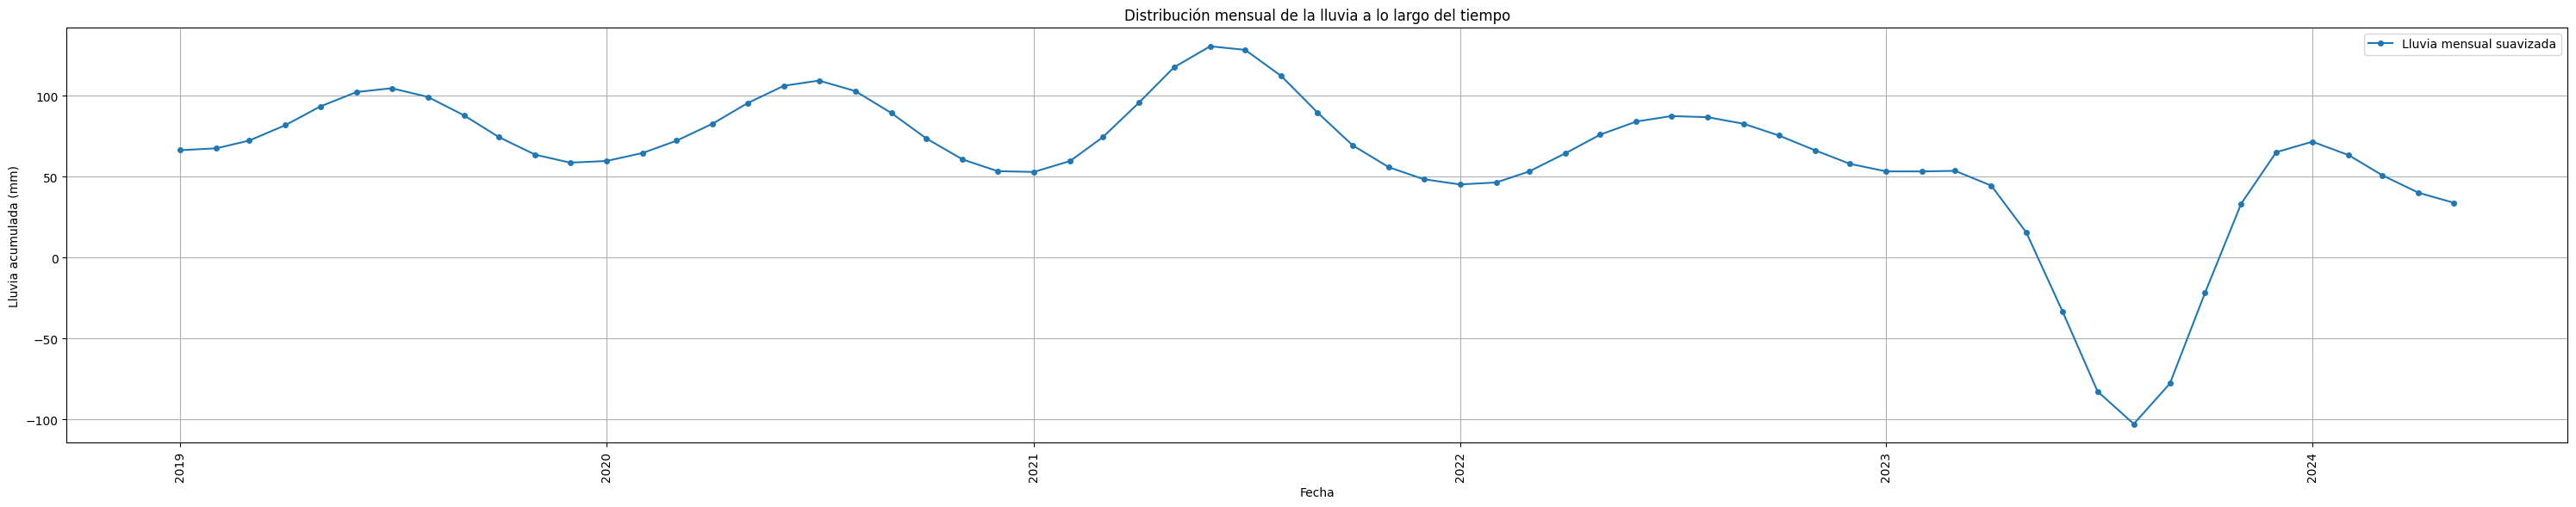

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


rain['FECHA_MEDICION'] = pd.to_datetime(rain['FECHA_MEDICION'])

# Filtrar los datos a partir del año 2019
rain2 = rain[rain['FECHA_MEDICION'].dt.year >= 2019]

# Extraer el año y el mes de la fecha
rain2['Year'] = rain2['FECHA_MEDICION'].dt.year
rain2['Month'] = rain2['FECHA_MEDICION'].dt.month

# Sumar la lluvia por mes y año para obtener una tendencia mensual
monthly_rain = rain2.groupby(['Year', 'Month'])[' LLUVIA'].sum().reset_index()

# Crear una columna de fecha combinada de año y mes
monthly_rain['YearMonth'] = pd.to_datetime(monthly_rain['Year'].astype(str) + '-' + monthly_rain['Month'].astype(str).str.zfill(2) + '-01')

# Suavizar los datos mensuales utilizando un filtro gaussiano
monthly_rain['LLUVIA_SMOOTH'] = gaussian_filter1d(monthly_rain[' LLUVIA'], sigma=2)

# Graficar con una figura más ancha y puntos más pequeños
plt.figure(figsize=(30, 6))  # Ajustar el tamaño de la figura (ancho x alto)
plt.plot(monthly_rain['YearMonth'], monthly_rain['LLUVIA_SMOOTH'], label='Lluvia mensual suavizada', marker='o', linestyle='-', markersize=4)  # markersize para hacer los puntos más pequeños
plt.title('Distribución mensual de la lluvia a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Lluvia acumulada (mm)')
plt.legend()
plt.grid(True)

# Ajustar las etiquetas del eje X para mostrar solo una vez por año
years = monthly_rain['YearMonth'].dt.year.unique()
ticks = [pd.to_datetime(f'{year}-01-01') for year in years]
plt.gca().set_xticks(ticks)
plt.gca().set_xticklabels(years, rotation=90)

plt.tight_layout()
plt.show()

<ipython-input-17-ca7b9fa06bd2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain2['Year'] = rain2['FECHA_MEDICION'].dt.year
<ipython-input-17-ca7b9fa06bd2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain2['Month'] = rain2['FECHA_MEDICION'].dt.month
<ipython-input-17-ca7b9fa06bd2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

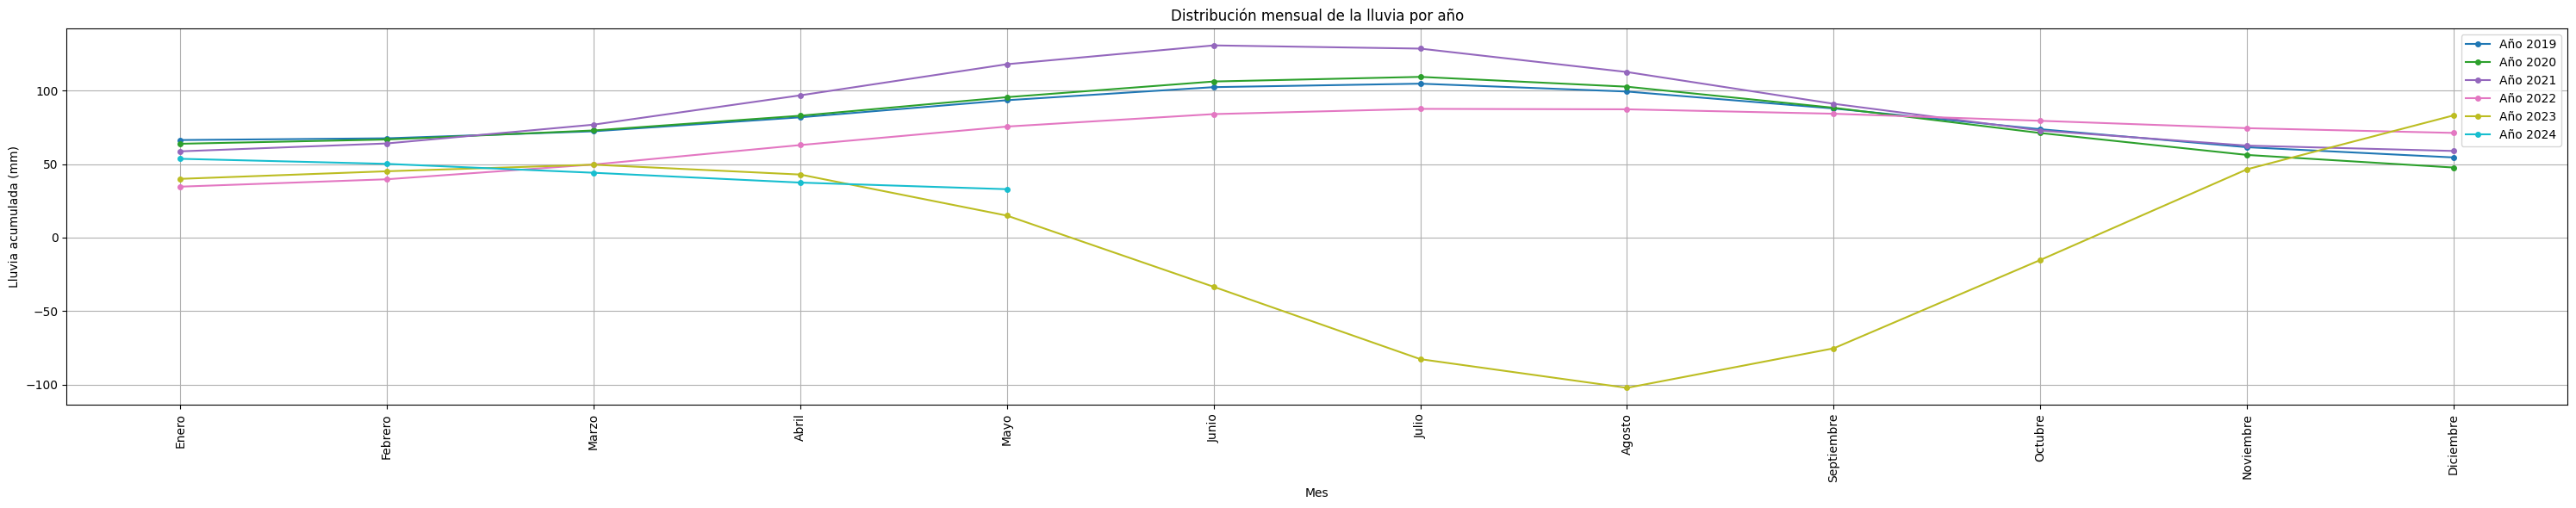

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Suponiendo que el DataFrame se llama rain y tiene las columnas mencionadas
rain['FECHA_MEDICION'] = pd.to_datetime(rain['FECHA_MEDICION'])

# Filtrar los datos a partir del año 2019
rain2 = rain[rain['FECHA_MEDICION'].dt.year >= 2019]

# Extraer el año y el mes de la fecha
rain2['Year'] = rain2['FECHA_MEDICION'].dt.year
rain2['Month'] = rain2['FECHA_MEDICION'].dt.month

# Crear una columna de fecha combinada de año y mes
rain2['YearMonth'] = pd.to_datetime(rain2['Year'].astype(str) + '-' + rain2['Month'].astype(str).str.zfill(2) + '-01')

# Inicializar el gráfico
plt.figure(figsize=(30, 6))  # Ajustar el tamaño de la figura (ancho x alto)

# Obtener los años únicos en los datos
years = rain2['Year'].unique()

# Asignar un color a cada año
colors = plt.cm.get_cmap('tab10', len(years))

# Iterar sobre los años y graficar cada uno por separado
for i, year in enumerate(years):
    yearly_data = rain2[rain2['Year'] == year]
    # Sumar la lluvia por mes y año para obtener una tendencia mensual
    monthly_rain = yearly_data.groupby(['Month'])[' LLUVIA'].sum().reset_index()
    # Suavizar los datos mensuales utilizando un filtro gaussiano
    monthly_rain['LLUVIA_SMOOTH'] = gaussian_filter1d(monthly_rain[' LLUVIA'], sigma=2)
    # Graficar cada año con un color distinto
    plt.plot(monthly_rain['Month'], monthly_rain['LLUVIA_SMOOTH'], label=f'Año {year}', color=colors(i), marker='o', linestyle='-', markersize=4)

plt.title('Distribución mensual de la lluvia por año')
plt.xlabel('Mes')
plt.ylabel('Lluvia acumulada (mm)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(1, 13), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=90)

plt.tight_layout()
plt.show()
